# Homework: Learning the tools
Robert Hatem

## 3.3 Econometrics data

In [198]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
import quandl
import functools
import seaborn as sns
from sklearn import linear_model
from scipy import interpolate
%matplotlib inline

3.3 (a)

In [184]:
path = '/Users/roberthatem/Documents/Chicago FinM/spring-2019/Quant Trading (Boonstra)/data/Econometrics_Data'

country_ids = {'COO_0.tab': 'Belgium',
               'COO_2700.tab': 'Canada',
               'COO_2762.tab': 'France',
               'COO_3026.tab': 'Sweden'}
data = {}

# read data
for filename in os.listdir(path):
    if filename == 'HEET.tab':
        HEET_df = pd.read_csv(path + '/HEET.tab' , '\t')
    else:
        data[country_ids[filename]] = pd.read_csv(path + '/' + filename , '\t')

3.3 (b)  
3.3 (c) interpolate _Growth_ as a function of timestamp

In [206]:
# regression
d_temp = HEET_df.loc[:, ['Timestamp','Growth']].dropna()
X = d_temp.Timestamp.values.reshape(-1,1)
y = d_temp.Growth.values.reshape(-1,1)

reg = linear_model.LinearRegression()
reg.fit(X, y)

f = interpolate.interp1d(X[:,0], y[:,0])


# find growth values
def interpolate_new(df, reg):
    cols = ['DiscountRate']
    d_temp = df.loc[:,cols]
    
    #y_pred = reg.predict(df.Timestamp.values.reshape(-1,1))
    y_pred = reg(df.Timestamp.values.reshape(-1,1))
    
    d_temp = d_temp.assign(Growth=y_pred).dropna()
    
    return d_temp

In [207]:
# interpolate growth
d = {country: interpolate_new(df, f) for country, df in data.items()}

3.3 (d) plot _Growth_ as a function of _DiscountRate_

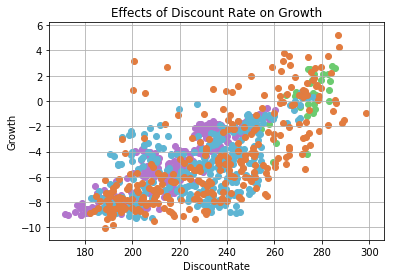

In [208]:
# https://matplotlib.org/gallery/showcase/bachelors_degrees_by_gender.html#sphx-glr-gallery-showcase-bachelors-degrees-by-gender-py
# plot
plt.grid()
plt.xlabel('DiscountRate')
plt.ylabel('Growth')
plt.title('Effects of Discount Rate on Growth');

# colors for the plot
color_sequence = {'Belgium': '#E27C3F',
                  'Canada': '#6CCB70',
                  'France': '#5EB5D3', 
                  'Sweden': '#B275CD'}

for country, df in d.items():
    # Plot each line separately with its own color.
    #column_rec_name = column.replace('\n', '_').replace(' ', '_')

    scat = plt.scatter(df.DiscountRate,
                       df.Growth,
                       lw=1,
                       color=color_sequence[country])